In [1]:
## pycistarget terminal version

import warnings
warnings.simplefilter(action = 'ignore')
import pycisTopic
pycisTopic.__version__
import numpy as np
import pandas as pd

projDir = '/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/hg38/'
outDir = projDir + 'output/'
import os
if not os.path.exists(outDir):
    os.makedirs(outDir)
tmpDir = '/media/ggj/FYT/CH/tmp/'
if not os.path.exists(tmpDir):
    os.makedirs(tmpDir)

In [2]:
saveDir = outDir + 'scenicplus/'
if not os.path.exists(saveDir):
    os.mkdir(saveDir)

In [3]:
# Downstream analysis
import pickle
infile = open(saveDir + 'scplus_obj_total.pkl', 'rb')
scplus_obj = pickle.load(infile)
infile.close()

In [4]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 960 x 1533 and n_cells x n_regions = 960 x 567121
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_cell:'lineage'
	menr:'CTX_DARs_All'
	dr_cell:'eRegulons_UMAP', 'eRegulons_tSNE'

In [5]:
len(list(set(scplus_obj.uns['eRegulon_metadata_filtered']['Region'])))

3751

In [6]:
len(list(set(scplus_obj.uns['eRegulon_metadata_filtered']['Gene'])))

982

2023-04-24 01:55:39,950 cisTopic     INFO     Calculating mean
2023-04-24 01:55:39,955 cisTopic     INFO     Calculating variance


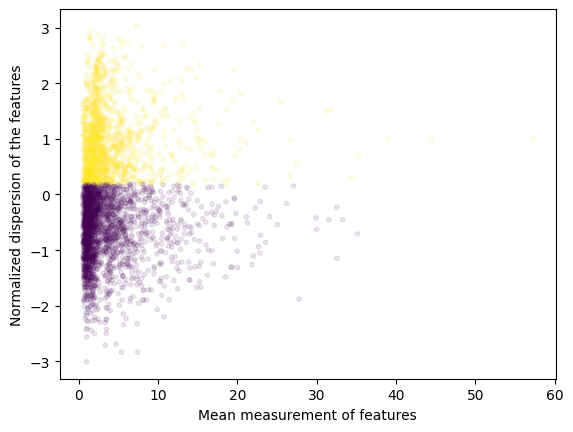

2023-04-24 01:55:40,205 cisTopic     INFO     Done!
2023-04-24 01:55:40,252 cisTopic     INFO     Calculating mean
2023-04-24 01:55:40,254 cisTopic     INFO     Calculating variance


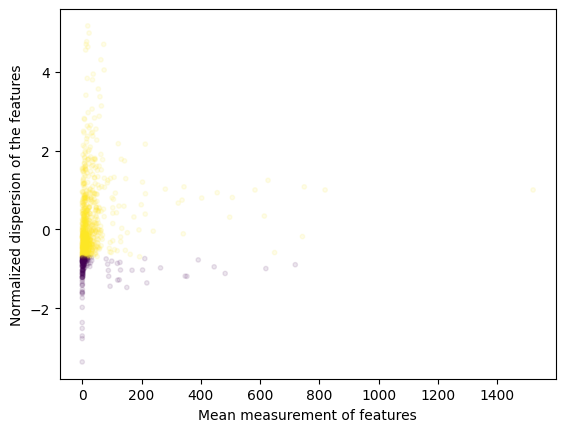

2023-04-24 01:55:40,406 cisTopic     INFO     Done!


In [8]:
from pycisTopic.diff_features import find_highly_variable_features
hvr = find_highly_variable_features(scplus_obj.to_df('ACC').loc[list(set(scplus_obj.uns['eRegulon_metadata_filtered']['Region']))], n_top_features=1500, plot = True)
hvg = find_highly_variable_features(scplus_obj.to_df('EXP')[list(set(scplus_obj.uns['eRegulon_metadata_filtered']['Gene']))].T, n_top_features=800, plot = True)

In [88]:
#all
from scenicplus.networks import create_nx_tables, create_nx_graph, plot_networkx, export_to_cytoscape
nx_tables = create_nx_tables(
    scplus_obj = scplus_obj,
    eRegulon_metadata_key ='eRegulon_metadata_filtered',
    subset_eRegulons = ['ELK3','FLI1','FOXO1','ERG','ETS1','IKZF1','SPI1','IRF4','IRF8','STAT1','SOX3','SOX10','SOX2','SOX8','POU3F2','ELF3','CDX1','CDX2','HNF4A','HNF4G','FOXA1','FOXJ1','NR1H4','CEBPA','MEF2C','MEF2D','HNF1B','HNF1A','TWIST1','TCF21'],
    subset_regions = hvr,
    subset_genes = hvg,
    add_differential_gene_expression = True,
    add_differential_region_accessibility = True,
    differential_variable = ['lineage'])

... storing 'lineage' as categorical
... storing 'lineage' as categorical
... storing 'lineage' as categorical


In [9]:
#neural
from scenicplus.networks import create_nx_tables, create_nx_graph, plot_networkx, export_to_cytoscape
nx_tables = create_nx_tables(
    scplus_obj = scplus_obj,
    eRegulon_metadata_key ='eRegulon_metadata_filtered',
    subset_eRegulons = ['SOX3','SOX10','SOX2','SOX8','POU3F2'],
    subset_regions = hvr,
    subset_genes = hvg,
    add_differential_gene_expression = True,
    add_differential_region_accessibility = True,
    differential_variable = ['lineage'])

... storing 'lineage' as categorical
... storing 'lineage' as categorical
... storing 'lineage' as categorical


In [23]:
#muscle
from scenicplus.networks import create_nx_tables, create_nx_graph, plot_networkx, export_to_cytoscape
nx_tables = create_nx_tables(
    scplus_obj = scplus_obj,
    eRegulon_metadata_key ='eRegulon_metadata_filtered',
    subset_eRegulons = ['MEF2C','MEF2D','TGIF1','MAFF','FOXL1','PGR','TFAP2C'],
    subset_regions = hvr,
    subset_genes = hvg,
    add_differential_gene_expression = True,
    add_differential_region_accessibility = True,
    differential_variable = ['lineage'])

... storing 'lineage' as categorical
... storing 'lineage' as categorical
... storing 'lineage' as categorical


In [58]:
#immune
from scenicplus.networks import create_nx_tables, create_nx_graph, plot_networkx, export_to_cytoscape
nx_tables = create_nx_tables(
    scplus_obj = scplus_obj,
    eRegulon_metadata_key ='eRegulon_metadata_filtered',
    subset_eRegulons = ['IKZF1','SPI1','IRF4','IRF8','STAT1'],
    subset_regions = hvr,
    subset_genes = hvg,
    add_differential_gene_expression = True,
    add_differential_region_accessibility = True,
    differential_variable = ['lineage'])

... storing 'lineage' as categorical
... storing 'lineage' as categorical
... storing 'lineage' as categorical


In [89]:
'PLAGL1' in nx_tables['Node']['TF']

False

In [84]:
G, pos, edge_tables, node_tables = create_nx_graph(nx_tables,
                   use_edge_tables = ['TF2R','R2G'],
                   color_edge_by = {'TF2R': {'variable' : 'TF', 'category_color' : {'IKZF1': 'sandybrown', 'SPI1': 'Purple','IRF8': 'darkred','IRF4':'brown','STAT1':'y','ELK3': 'sandybrown', 'FLI1': 'Purple','FOXO1': 'powderblue','ERG':'brown','ETS1':'steelblue','SOX3': 'sandybrown', 'SOX10': 'Purple','SOX8': 'darkred','SOX2':'brown','POU3F2':'y','ELF3': 'sandybrown', 'CDX1': 'Purple','CDX2': 'darkred','HNF4A':'brown','HNF4G':'y','FOXA1':'y','FOXJ1':'y','NR1H4':'y','CEBPA':'y','MEF2C':'y','MEF2D':'y','HNF1B':'y','HNF1A':'y','TWIST1':'y','TCF21':'y'}},
                                    'R2G': {'variable' : 'R2G_rho', 'continuous_color' : 'viridis', 'v_min': -1, 'v_max': 1}},
                   transparency_edge_by =  {'R2G': {'variable' : 'R2G_importance', 'min_alpha': 0.1, 'v_min': 0}},
                   width_edge_by = {'R2G': {'variable' : 'R2G_importance', 'max_size' :  1.5, 'min_size' : 1}},
                   color_node_by = {'TF': {'variable': 'TF', 'category_color' : {'IKZF1': 'sandybrown', 'SPI1': 'Purple','IRF8': 'darkred','IRF4':'brown','STAT1':'y','ELK3': 'sandybrown', 'FLI1': 'Purple','FOXO1': 'powderblue','ERG':'brown','ETS1':'steelblue','SOX3': 'sandybrown', 'SOX10': 'Purple','SOX8': 'darkred','SOX2':'brown','POU3F2':'y','ELF3': 'sandybrown', 'CDX1': 'Purple','CDX2': 'darkred','HNF4A':'brown','HNF4G':'y','FOXA1':'y','FOXJ1':'y','NR1H4':'y','CEBPA':'y','MEF2C':'y','MEF2D':'y','HNF1B':'y','HNF1A':'y','TWIST1':'y','TCF21':'y'}},
                                    'Gene': {'variable': {'lineage_Log2FC_Immune'}, 'continuous_color' : 'bwr'},
                                    'Region': {'variable': {'lineage_Log2FC_Immune'}, 'continuous_color' : 'viridis'}},
                   transparency_node_by =  {'Region': {'variable' : {'lineage_Log2FC_Endothelial'}, 'min_alpha': 0.1},
                                    'Gene': {'variable' : {'lineage_Log2FC_Endothelial'}, 'min_alpha': 0.1}},
                   size_node_by = {'TF': {'variable': 'fixed_size', 'fixed_size': 30},
                                    'Gene': {'variable': 'fixed_size', 'fixed_size': 15},
                                    'Region': {'variable': 'fixed_size', 'fixed_size': 10}},
                   shape_node_by = {'TF': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Gene': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Region': {'variable': 'fixed_shape', 'fixed_shape': 'diamond'}},
                   label_size_by = {'TF': {'variable': 'fixed_label_size', 'fixed_label_size': 20.0},
                                    'Gene': {'variable': 'fixed_label_size', 'fixed_label_size': 10.0},
                                    'Region': {'variable': 'fixed_label_size', 'fixed_label_size': 0.0}},
                   layout='kamada_kawai_layout',
                   scale_position_by=250)

In [13]:
import matplotlib.pyplot as plt

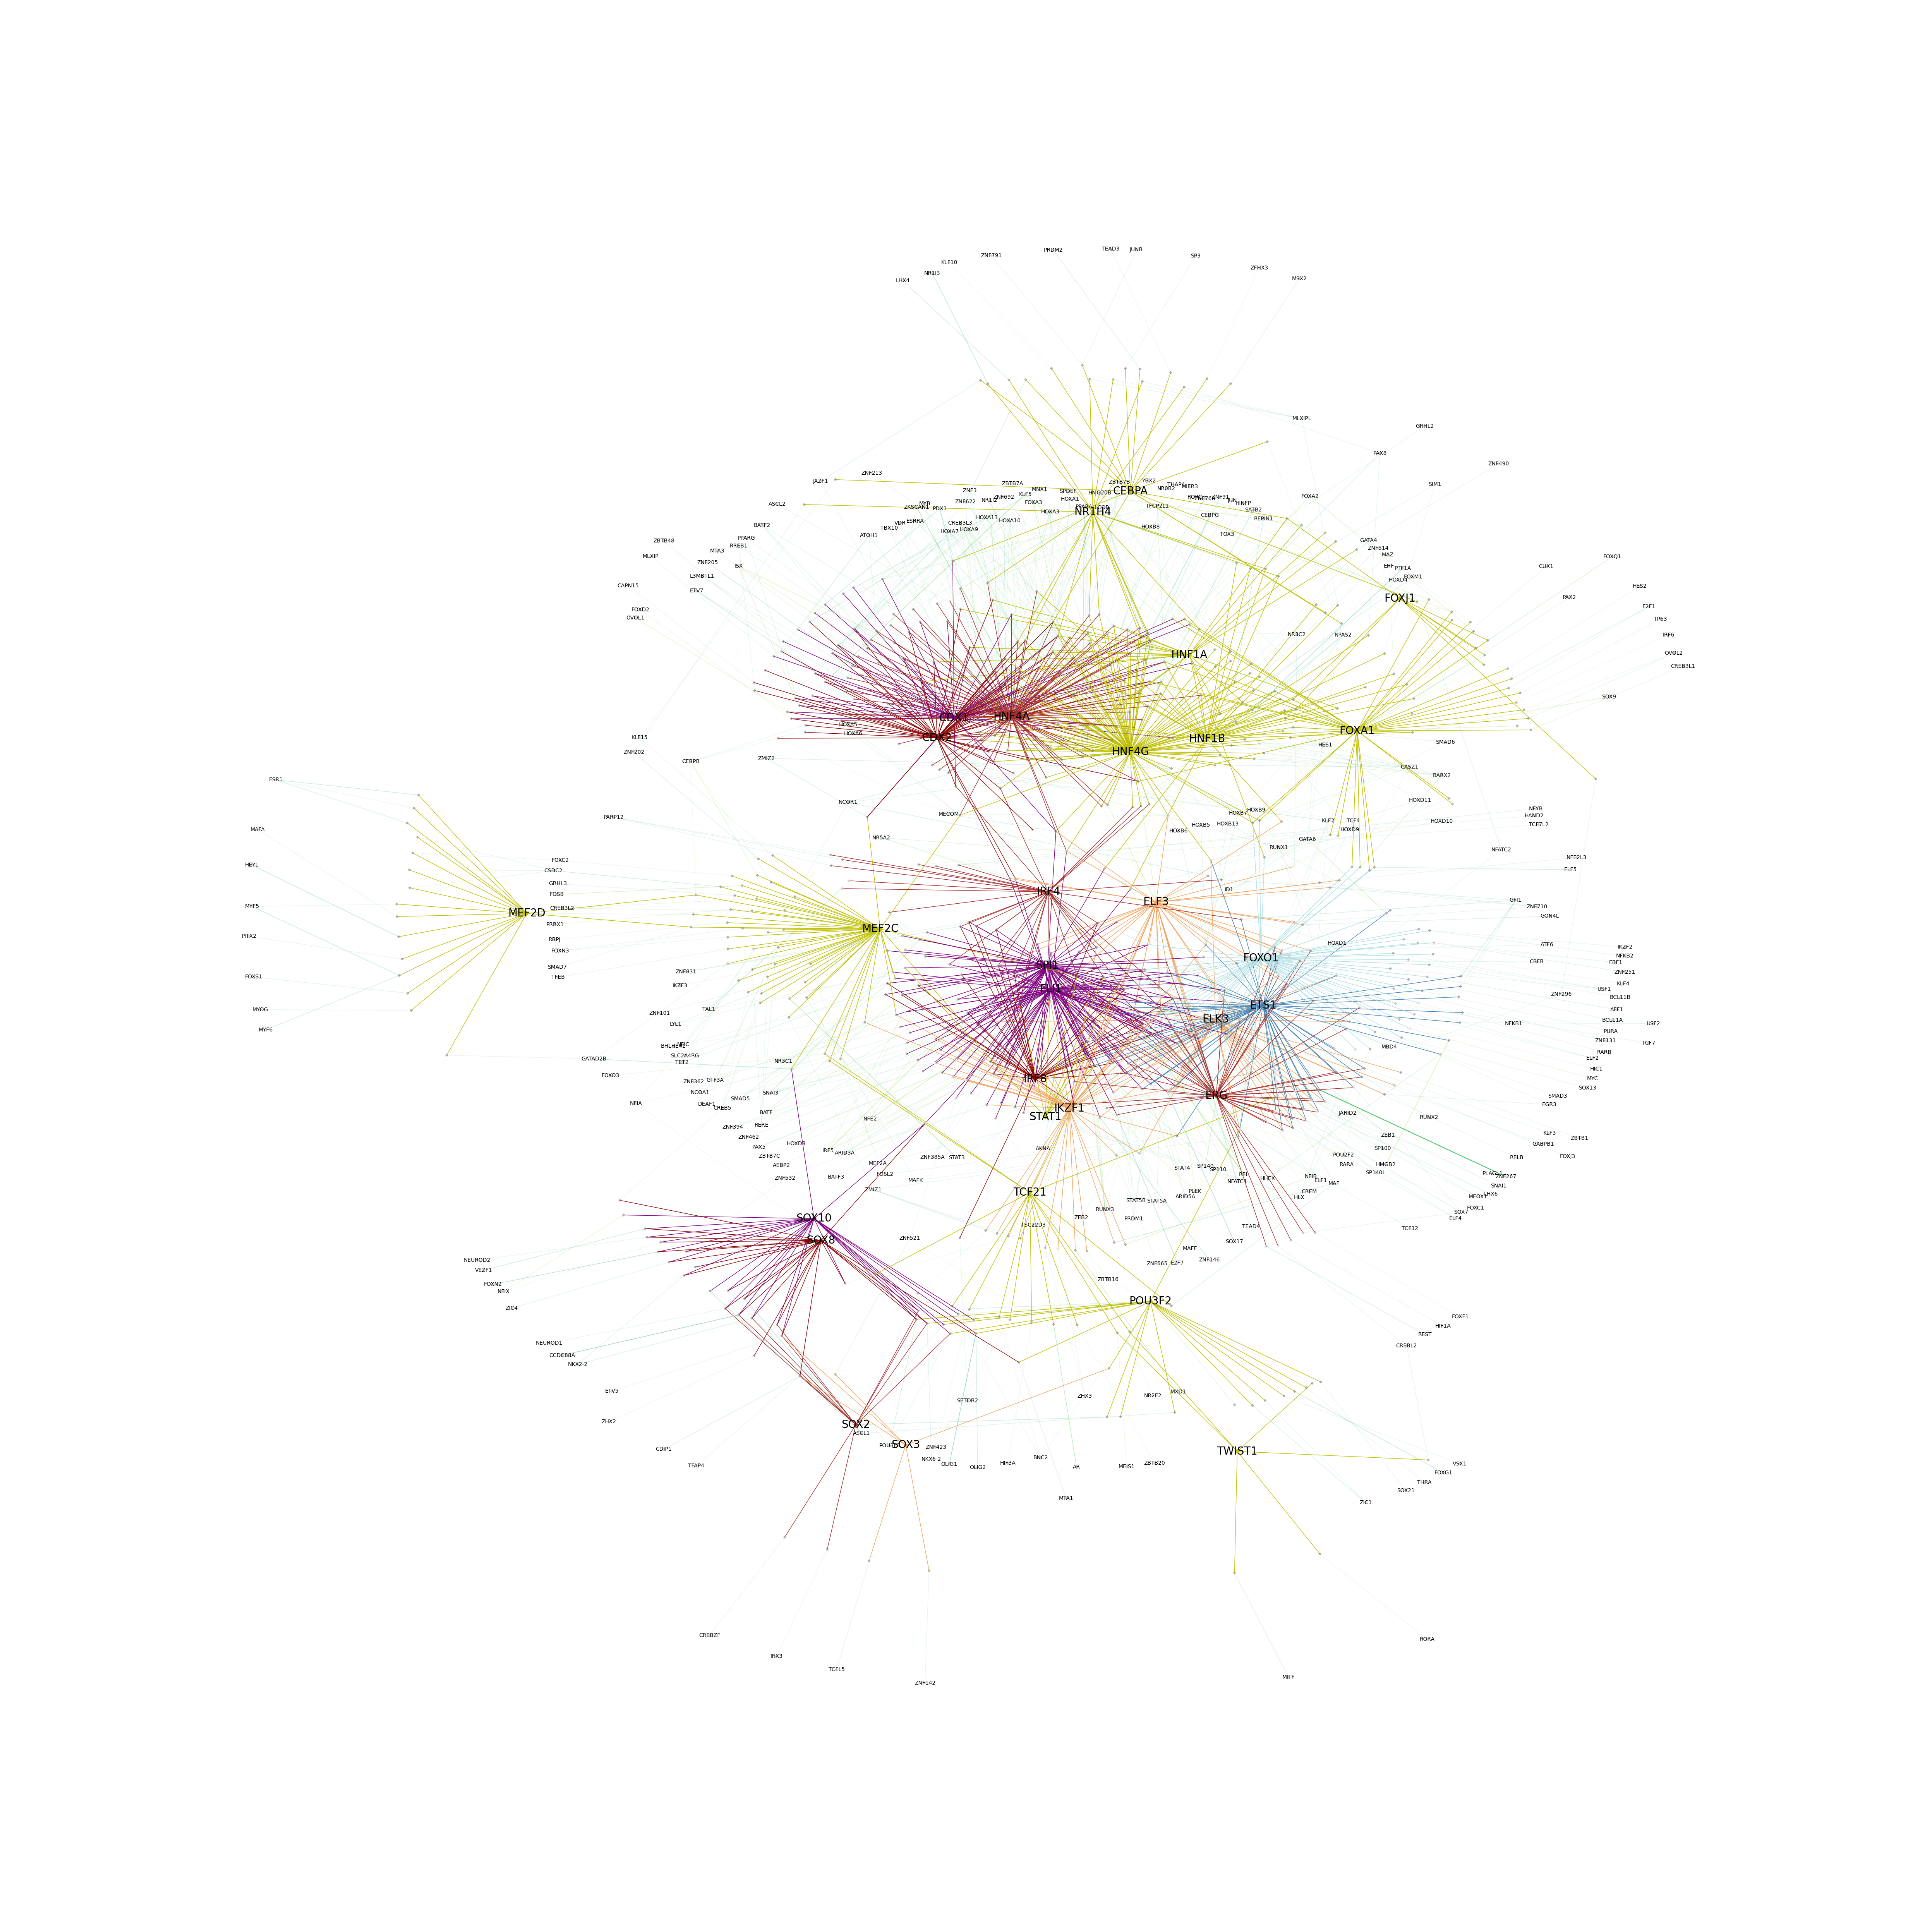

In [85]:
plt.figure(figsize=(50,50))
plot_networkx(G, pos)
plt.show()

In [86]:
export_to_cytoscape(G,pos,out_file='./network_total.cyjs')

In [77]:
pos

{'POU3F2': array([ 0.44576452, -0.00821493]),
 'chr14:28774324-28774824': array([ 0.65196745, -0.24041802]),
 'chr6:98827460-98827960': array([0.15422494, 0.04287018]),
 'chr21:33025454-33025954': array([ 0.27619424, -0.09435056]),
 'chr3:147393135-147393635': array([ 0.71399985, -0.08023516]),
 'chr2:104872366-104872866': array([0.24090005, 0.21496128]),
 'chr10:132714077-132714577': array([ 0.11639161, -0.08298387]),
 'chr3:181752288-181752788': array([0.43719612, 0.15732783]),
 'chr3:181726482-181726982': array([0.24620154, 0.11396045]),
 'chr15:57337777-57338277': array([0.71358099, 0.10567047]),
 'chr14:105499254-105499754': array([ 0.12039479, -0.16648015]),
 'chr20:25032598-25033098': array([0.64444418, 0.27302655]),
 'SOX10': array([-0.05330678,  0.11484925]),
 'chr2:104844931-104845431': array([0.04115096, 0.25656355]),
 'chr20:21508510-21509010': array([-0.03334947,  0.3094672 ]),
 'chr17:39632578-39633078': array([-0.33667972,  0.22829323]),
 'chr17:57906891-57907391': array